In [1]:
# DoBasicStats

In [3]:
from common_immunogit import *

2025-04-16 13:12:02,048 - INFO - Root path: /Users/guillaume.souede/PycharmProjects/immunogit
2025-04-16 13:12:02,049 - INFO - Directory structure set up successfully.


In [ ]:
import json
import pandas as pd
from collections import defaultdict
from pathlib import Path

# Chargement
file_path = str(root_path / "metadata/model_metadata_tags.json")
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

keywords_file_path = root_path / "tmp/keywords.json"
with open(keywords_file_path, "r", encoding="utf-8") as keywords_file:
    keywords_dict = json.load(keywords_file)

# Pour les titres
title_keywords = ["immune system", "immune response", "therapy"]

tag_counts = defaultdict(int)
title_classification = {}

for model_id, model_info in data.items():
    title = model_info.get("title", "").lower()
    title_category = "OTHER"

    for keyword in title_keywords:
        if keyword in title:
            title_category = keyword
            break

    title_classification[model_id] = title_category

category_term_counts = defaultdict(lambda: defaultdict(int))

for model_id, model_info in data.items():
    title_category = title_classification.get(model_id, "OTHER")

    if "tags" in model_info:
        for tag in model_info["tags"]:
            if ":" in tag:
                _, term = map(str.strip, tag.split(":", 1))
                term_lower = term.lower()
                
                for category, terms in keywords_dict.items():
                    if term_lower in [t.lower() for t in terms]:
                        category_term_counts[category][term_lower] += 1
                        
                        if title_category == category:
                            category_term_counts[category][term_lower] += 1

count_table = []
for category, terms in category_term_counts.items():
    for term, count in terms.items():
        count_table.append({"Category": category, "Term": term, "Count": count})

for title_category in ["immune system", "immune response", "therapy", "OTHER"]:
    for term in keywords_dict.get(title_category, []):
        count = list(title_classification.values()).count(title_category)
        count_table.append({"Category": "Title", "Term": term, "Count": count})

df_counts = pd.DataFrame(count_table)
df_counts.to_csv("model_metadata_counts.tsv", sep='\t', index=False)

print(df_counts)
df_counts

        Category                             Term  Count
0         Global                  immuno-oncology     68
1         Global                             sbml     36
2         Global                        biomodels     25
3   Interactions                     tumor growth      9
4   Interactions               immune suppression      2
5   Interactions                  immune response     17
6   Interactions                      bistability      1
7       Diseases                            tumor     14
8       Diseases                           cancer     17
9          Cells                              ctl      2
10         Cells                      tumor cells     10
11         Cells                     cancer cells     12
12         Cells                          b cells      1
13       Biology                 global stability      2
14   Mathematics  ordinary differential equations     10
15    Treatments                    immunotherapy     17
16    Treatments               

,Category,Term,Count
0,Global,immuno-oncology,68
1,Global,sbml,36
2,Global,biomodels,25
3,Interactions,tumor growth,9
4,Interactions,immune suppression,2
5,Interactions,immune response,17
6,Interactions,bistability,1
7,Diseases,tumor,14
8,Diseases,cancer,17
9,Cells,ctl,2


In [7]:
import json
import pandas as pd
from collections import defaultdict
from pathlib import Path

file_path = str(root_path / "metadata/model_metadata_tags.json")
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

keywords_file_path = root_path / "tmp/keywords.json"
with open(keywords_file_path, "r", encoding="utf-8") as keywords_file:
    keywords_dict = json.load(keywords_file)

title_keywords = ["immune system", "immune response", "therapy"]

title_classification = {}

for model_id, model_info in data.items():
    title = model_info.get("name", "").lower()
    title_category = "OTHER"

    for keyword in title_keywords:
        if keyword in title:
            title_category = keyword
            break

    title_classification[model_id] = title_category

category_term_counts = defaultdict(lambda: defaultdict(int))

for model_id, model_info in data.items():
    title_category = title_classification.get(model_id, "OTHER")

    if "tags" in model_info:
        for tag in model_info["tags"]:
            if ":" in tag:
                _, term = map(str.strip, tag.split(":", 1))
                term_lower = term.lower()
                
                for category, terms in keywords_dict.items():
                    if term_lower in [t.lower() for t in terms]:
                        category_term_counts[category][term_lower] += 1

                        if title_category == category:
                            category_term_counts[category][term_lower] += 1

count_table = []

for term in set(term.lower().strip() for terms in keywords_dict.values() for term in terms):
    row = {"Term": term}
    for category in ["immune system", "immune response", "therapy", "OTHER"]:
        row[category] = category_term_counts[category].get(term, 0)
    
    count_table.append(row)

df_counts = pd.DataFrame(count_table)
df_counts.to_csv("model_metadata_counts.tsv", sep='\t', index=False)

print(df_counts)
df_counts


                               Term  immune system  immune response  therapy  \
0                      solid tumors              0                0        0   
1    tumor-infiltrating lymphocytes              0                0        0   
2                      saddle point              0                0        0   
3                      benign tumor              0                0        0   
4                   stable manifold              0                0        0   
..                              ...            ...              ...      ...   
103              tumor-specific ctl              0                0        0   
104                pharmacokinetics              0                0        0   
105               gompertzian model              0                0        0   
106                  effector cells              0                0        0   
107                  immune-induced              0                0        0   

     OTHER  
0        0  
1        0  


,Term,immune system,immune response,therapy,OTHER
0,solid tumors,0,0,0,0
1,tumor-infiltrating lymphocytes,0,0,0,0
2,saddle point,0,0,0,0
3,benign tumor,0,0,0,0
4,stable manifold,0,0,0,0
...,...,...,...,...,...
103,tumor-specific ctl,0,0,0,0
104,pharmacokinetics,0,0,0,0
105,gompertzian model,0,0,0,0
106,effector cells,0,0,0,0


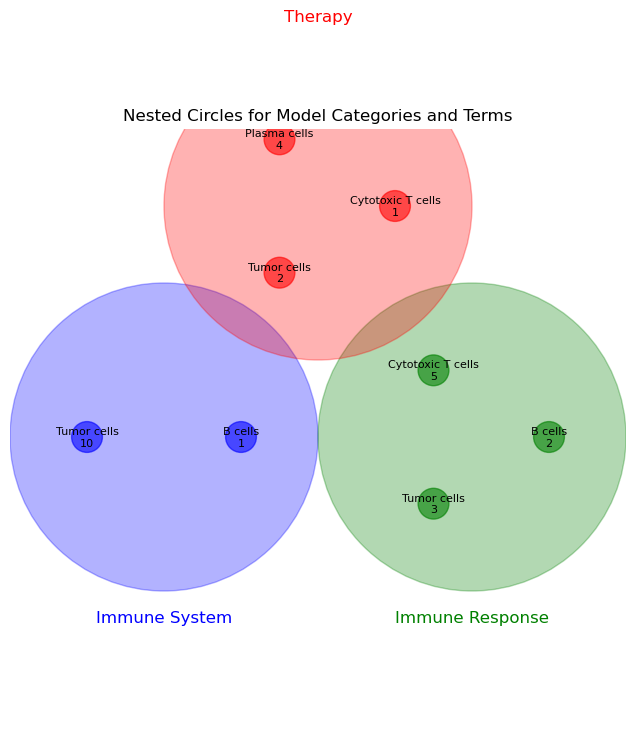

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# TEST
immune_system_terms = {
    "B cells": 1,
    "Tumor cells": 10
}

immune_response_terms = {
    "B cells": 2,
    "Cytotoxic T cells": 5,
    "Tumor cells": 3
}

therapy_terms = {
    "Cytotoxic T cells": 1,
    "Plasma cells": 4,
    "Tumor cells": 2
}

def draw_nested_circles(ax, center, radius, terms, color):
    main_circle = Circle(center, radius, color=color, alpha=0.3)
    ax.add_patch(main_circle)
    
    # sous-cercles
    num_terms = len(terms)
    angle_step = 360 / num_terms 
    sub_circle_radius = radius * 0.1

    for i, (term, count) in enumerate(terms.items()):
        angle = i * angle_step
        x = center[0] + radius * 0.5 * np.cos(angle * np.pi / 180)  # Utiliser np.cos
        y = center[1] + radius * 0.5 * np.sin(angle * np.pi / 180)  # Utiliser np.sin
        
        sub_circle = Circle((x, y), sub_circle_radius, color=color, alpha=0.6)
        ax.add_patch(sub_circle)
        
        ax.text(x, y, f"{term}\n{count}", ha='center', va='center', fontsize=8)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')

draw_nested_circles(ax, center=(-1, 0), radius=1, terms=immune_system_terms, color='blue')
draw_nested_circles(ax, center=(1, 0), radius=1, terms=immune_response_terms, color='green')
draw_nested_circles(ax, center=(0, 1.5), radius=1, terms=therapy_terms, color='red')

ax.text(-1, -1.2, "Immune System", ha='center', fontsize=12, color='blue')
ax.text(1, -1.2, "Immune Response", ha='center', fontsize=12, color='green')
ax.text(0, 2.7, "Therapy", ha='center', fontsize=12, color='red')

ax.axis('off')

plt.title("Venn Diagram")
plt.show()
